In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir(r'C:\Users\Connor\Documents\NOD\BC#4\Projects\Supervised ML Project')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.dummy import DummyClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, f1_score, accuracy_score, precision_score, make_scorer
from sklearn.impute import SimpleImputer

from joblib import dump

# Supervised Machine Learning Project - Phishing Detection

- Make an Anti-Phishing ML model
- Aim is to be able to predict Phising Websites to minimise threats apposed by phishing such as:

        - Fraud
        - Identity Theft
        - Exposing sensitive data eg. Credit Card Numbers, Bank information and Passwords

### Data

This dataset contains 48 features extracted from 5000 phishing webpages and 5000 legitimate webpages, which were downloaded from January to May 2015 and from May to June 2017. An improved feature extraction technique is employed by leveraging the browser automation framework (i.e., Selenium WebDriver), which is more precise and robust compared to the parsing approach based on regular expressions.

In [2]:
df = pd.read_csv("Phishing_Legitimate_full.csv")
print(df.shape)
df.head()

(10000, 50)


,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


#### Understanding the data

- id: Website ID
- NumDots: Num Dots on web link
- SubdomainLevel: Number of subdomains before site name eg. *blogname*.mywebsite.com
- PathLevel: Information after top level domain name eg. mywebite.com/*beans*
- UrlLength: Characters in ULR
- NumDash: Number of `-`
- NumDashInHostname: Number of `-` in domain name
- AtSymbol: Does URL contain `@`
- TildeSymbol: Does URL contain `~`
- NumUnderscore: Number of `_`
- NumPercent: Number of `%`
- NumQueryComponents: Number of Queries in URL eg. mywebsite.com/page *?name=beans&*
- NumAmpersand: Number of `&`
- NumHash: Number of `#`
- NumNumericChars: Number of numerical characters
- NoHttps: Does URL contain `https`
- RandomString: Does URL contain a random string
- IpAddress: Does URL contain an IpAddress
- DomainInSubdomains: Is domain name within the subdomains
- DomainInPaths: Is domain name within URL path
- HttpsInHostname: Does hostname contain `https`
- HostnameLength: Hostname characters
- PathLength: Path characters
- QueryLength: Query characters
- DoubleSlashInPath: Does path contain `//`
- NumSensitiveWords: Number of sensitive words eg. "secure", "account" & "banking"
- EmbeddedBrandName: Is the URL hidden behind the brand name
- PctExtHyperlinks: Percentage of hyperlinks to external pages in HTML code (another website)
- PctExtResourceUrls: Percentage of URLs to external specific webpages in HTML code
- ExtFavicon: Does webpage contail a Favicon (Icon in the corner of a tab)
- InsecureForms: Does the website submit on `Https`
- RelativeFormAction: Form-data is submitted within website eg. action=mywebsite.come/example.html
- ExtFormAction: Form-data is submitted to an external website eg. action=example.html
- AbnormalFormAction: Form-data is neither of the above?
- PctNullSelfRedirectHyperlinks: Percentage of hyperlinks redirecting to itself
- FrequentDomainNameMismatch: Does the SSL Certificate mismatch the name displayed in the URL
- FakeLinkInStatusBar: Does a fake link appear in the status bar
- RightClickDisabled: Is right click disabled on website
- PopUpWindow: Is there a popup window
- SubmitInfoToEmail: Does HTML code contain the HTML "mailto" function
- IFrameOrFrame: HTML uses IFrame or Frame
- MissingTitle: Is title missing
- ImagesOnlyInForm: Images in form
- SubdomainLevelRT: Counts percentage of subdomain levels
- UrlLengthRT: Realtime?
- PctExtResourceUrlsRT: Realtime?
- AbnormalExtFormActionR: Realtime?
- ExtMetaScriptLinkRT: Counts percentage of mata, script and link tags contailing external URL
- PctExtNullSelfRedirectHyperlinksRT: Counts the percentage of hyperlinks in HTML source code that uses different domain names, starts with "#", or using "JavaScript ::void(0)"
- CLASS_LABEL: **Target**

In [3]:
# Check for missing data & Dtype overview

df.info()

# No missing Data
# All numerical data: 3 - Float, 47 - Integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [4]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")
    print()

# Drop HttpsInHostname column as it only has 1 unique value.


id: 10000

NumDots: 17

SubdomainLevel: 13

PathLevel: 18

UrlLength: 226

NumDash: 25

NumDashInHostname: 10

AtSymbol: 2

TildeSymbol: 2

NumUnderscore: 16

NumPercent: 14

NumQueryComponents: 19

NumAmpersand: 16

NumHash: 2

NumNumericChars: 82

NoHttps: 2

RandomString: 2

IpAddress: 2

DomainInSubdomains: 2

DomainInPaths: 2

HttpsInHostname: 1

HostnameLength: 74

PathLength: 147

QueryLength: 164

DoubleSlashInPath: 2

NumSensitiveWords: 4

EmbeddedBrandName: 2

PctExtHyperlinks: 2510

PctExtResourceUrls: 1489

ExtFavicon: 2

InsecureForms: 2

RelativeFormAction: 2

ExtFormAction: 2

AbnormalFormAction: 2

PctNullSelfRedirectHyperlinks: 1311

FrequentDomainNameMismatch: 2

FakeLinkInStatusBar: 2

RightClickDisabled: 2

PopUpWindow: 2

SubmitInfoToEmail: 2

IframeOrFrame: 2

MissingTitle: 2

ImagesOnlyInForm: 2

SubdomainLevelRT: 3

UrlLengthRT: 3

PctExtResourceUrlsRT: 3

AbnormalExtFormActionR: 3

ExtMetaScriptLinkRT: 3

PctExtNullSelfRedirectHyperlinksRT: 3

CLASS_LABEL: 2



In [5]:
df.corrwith(df["CLASS_LABEL"]).sort_values() #

# I will use the columns that have the highest correlation with our target. 5 highest Negative correlation and 5 highest Positive correlation

# PctExtNullSelfRedirectHyperlinksRT, NumDash, SubmitInfoToEmail, IframeOrFrame, NumQueryComponents
# FrequentDomainNameMismatch, PctNullSelfRedirectHyperlinks, PctExtHyperlinks, NumDots, InsecureForms

id                                   -0.866025
PctExtNullSelfRedirectHyperlinksRT   -0.540545
NumDash                              -0.372235
SubmitInfoToEmail                    -0.357635
IframeOrFrame                        -0.235233
NumQueryComponents                   -0.147391
AbnormalFormAction                   -0.145073
DomainInPaths                        -0.118201
ExtFormAction                        -0.105164
NumUnderscore                        -0.098869
RandomString                         -0.085308
RelativeFormAction                   -0.082589
NumAmpersand                         -0.081446
QueryLength                          -0.080525
PathLength                           -0.076125
SubdomainLevelRT                     -0.075799
UrlLength                            -0.074493
NoHttps                              -0.072219
NumPercent                           -0.068465
PopUpWindow                          -0.067308
PctExtResourceUrls                   -0.021922
AtSymbol     

In [6]:
#df = df[[   "PctExtNullSelfRedirectHyperlinksRT", "NumDash", "SubmitInfoToEmail", "IframeOrFrame", "NumQueryComponents",
            #"FrequentDomainNameMismatch", "PctNullSelfRedirectHyperlinks", "PctExtHyperlinks", "NumDots", "InsecureForms",
            #"CLASS_LABEL"]]

In [7]:
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [8]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")
    print()


id: 10000

NumDots: 17

SubdomainLevel: 13

PathLevel: 18

UrlLength: 226

NumDash: 25

NumDashInHostname: 10

AtSymbol: 2

TildeSymbol: 2

NumUnderscore: 16

NumPercent: 14

NumQueryComponents: 19

NumAmpersand: 16

NumHash: 2

NumNumericChars: 82

NoHttps: 2

RandomString: 2

IpAddress: 2

DomainInSubdomains: 2

DomainInPaths: 2

HttpsInHostname: 1

HostnameLength: 74

PathLength: 147

QueryLength: 164

DoubleSlashInPath: 2

NumSensitiveWords: 4

EmbeddedBrandName: 2

PctExtHyperlinks: 2510

PctExtResourceUrls: 1489

ExtFavicon: 2

InsecureForms: 2

RelativeFormAction: 2

ExtFormAction: 2

AbnormalFormAction: 2

PctNullSelfRedirectHyperlinks: 1311

FrequentDomainNameMismatch: 2

FakeLinkInStatusBar: 2

RightClickDisabled: 2

PopUpWindow: 2

SubmitInfoToEmail: 2

IframeOrFrame: 2

MissingTitle: 2

ImagesOnlyInForm: 2

SubdomainLevelRT: 3

UrlLengthRT: 3

PctExtResourceUrlsRT: 3

AbnormalExtFormActionR: 3

ExtMetaScriptLinkRT: 3

PctExtNullSelfRedirectHyperlinksRT: 3

CLASS_LABEL: 2



### X & y

In [9]:
target = "CLASS_LABEL"
cols_to_drop = ["id", "SubdomainLevel", "PathLevel", "UrlLength", 'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
                "NumPercent", 'NumAmpersand', 'NumHash', 'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
                'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname', 'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
                'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtResourceUrls', 'ExtFavicon', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
                'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow', 'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
                'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT', "CLASS_LABEL"]

X = df.drop(cols_to_drop, axis=1)
y = df[target]

### Baseline

Baseline for data 50%

In [14]:
y.value_counts(normalize=True)

1    0.5
0    0.5
Name: CLASS_LABEL, dtype: float64

### Train Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Defining Scoring Metrics

TP - Predicted phishing, truely are phishing
FP - Predicted phishing, truely are NOT phishing
TN - Predicted NOT phishing, truely are NOT phishing
FN - Predicted NOT phishing, truely are phishing

I feel FN are more damaging so we want to get this error margin as low as possible.

We can sacrific precision with higher **recall** to minimise the phishing sites escaping detection

### Preprocessing & GridSearchCV

In [16]:
classifiers = [     LogisticRegression(),
                    DecisionTreeClassifier(),
                    RandomForestClassifier(),
                    SVC(),
                    KNeighborsClassifier(),
                    GaussianNB()]

num_cols = ["PctExtNullSelfRedirectHyperlinksRT", "NumDash", "NumQueryComponents", "PctNullSelfRedirectHyperlinks", "PctExtHyperlinks", "NumDots"]
# Rest are already binary

scaler = StandardScaler()

for c in classifiers:

    preprocessor = make_column_transformer((scaler, num_cols))

    pipe = make_pipeline(preprocessor, c)
    grid = GridSearchCV(    estimator=pipe,
                                param_grid={},
                                cv=5,
                                scoring="recall",
                                n_jobs=-1)
    grid.fit(X_train, y_train)

    print(f"Recall Score for {c}: {grid.best_score_}\n")


Recall Score for LogisticRegression(): 0.8247366313840303

Recall Score for DecisionTreeClassifier(): 0.9569772873241081

Recall Score for RandomForestClassifier(): 0.9595726046593098

Recall Score for SVC(): 0.9237665674081861

Recall Score for KNeighborsClassifier(): 0.9422461610322882

Recall Score for GaussianNB(): 0.6098758017833162



### Hyperparameter Tuning
- Chosen RandomForestClassifier

In [17]:
num_cols = ["PctExtNullSelfRedirectHyperlinksRT", "NumDash", "NumQueryComponents", "PctNullSelfRedirectHyperlinks", "PctExtHyperlinks", "NumDots"]
# Rest are already binary

param_grid_rf = {   "randomforestclassifier__n_estimators":[2, 4, 8, 16, 32, 64, 100, 200],
                    "randomforestclassifier__max_features":[None, "sqrt", "log2", "auto"]}

classifier = RandomForestClassifier()
scaler = StandardScaler()

preprocessor = make_column_transformer((scaler, num_cols))

pipe = make_pipeline(preprocessor, classifier)

grid_rf = GridSearchCV(     estimator=pipe,
                            param_grid=param_grid_rf,
                            cv=5,
                            scoring="recall",
                            n_jobs=-1)

grid_rf.fit(X_train, y_train)

print("Best Score: ", grid_rf.best_score_)
print("Best Params: ", grid_rf.best_params_)

Best Score:  0.9624586075453129
Best Params:  {'randomforestclassifier__max_features': None, 'randomforestclassifier__n_estimators': 200}


### Train Data

In [18]:
num_cols = ["PctExtNullSelfRedirectHyperlinksRT", "NumDash", "NumQueryComponents", "PctNullSelfRedirectHyperlinks", "PctExtHyperlinks", "NumDots"]
# Rest are already binary

classifier = RandomForestClassifier(random_state=42, max_features=None, n_estimators=100)
scaler = StandardScaler()

preprocessor = make_column_transformer((scaler, num_cols))

pipe = make_pipeline(preprocessor, classifier)

pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['PctExtNullSelfRedirectHyperlinksRT',
                                                   'NumDash',
                                                   'NumQueryComponents',
                                                   'PctNullSelfRedirectHyperlinks',
                                                   'PctExtHyperlinks',
                                                   'NumDots'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=None, random_state=42))])

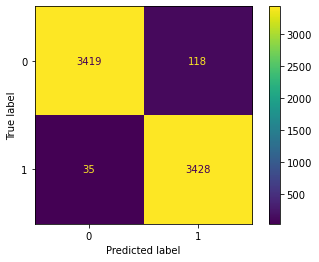

0.9781428571428571


In [19]:
y_pred = pipe.predict(X_train)
cm = confusion_matrix(y_train, y_pred, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)

disp.plot()
plt.show()

print(pipe.score(X_train, y_train))

In [20]:
#classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_features=None)
#0.9781428571428571

# 35 FN

### Baseline Test Data

In [21]:
y_train.value_counts(normalize=True)

0    0.505286
1    0.494714
Name: CLASS_LABEL, dtype: float64

In [22]:
dummy = DummyClassifier()

dummy.fit(X_train, y_train)

DummyClassifier()

In [23]:
y_true = y_test.copy()
y_pred = dummy.predict(X_test)

In [24]:
baseline = accuracy_score(y_true, y_pred)
print(f"The baseline to beat is {round(baseline, 3)}")

The baseline to beat is 0.488


### Test Data

In [25]:
y_pred = pipe.predict(X_test)

test_score = recall_score(y_test, y_pred)
print(f"Test Score: {round(test_score*100, 2)}")
print(f"Baseline: {round(baseline*100, 2)}")

Test Score: 95.12
Baseline: 48.77


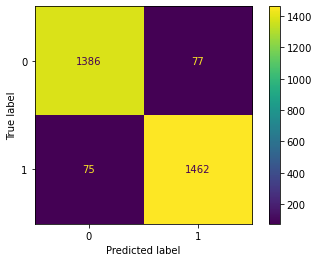

In [26]:
cm = confusion_matrix(y_test, y_pred, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)

disp.plot()
plt.show()

In [27]:
# 75 Phishing sites gone undetected

95.12036434612882

In [35]:
X.columns

Index(['NumDots', 'NumDash', 'NumQueryComponents', 'PctExtHyperlinks',
       'InsecureForms', 'PctNullSelfRedirectHyperlinks',
       'FrequentDomainNameMismatch', 'SubmitInfoToEmail', 'IframeOrFrame',
       'PctExtNullSelfRedirectHyperlinksRT'],
      dtype='object')